### HACKATHON CHALLENGE 

Here the dataset of a car ride company was given in which we had to answer some questions by analysing the data.
The dataset consists of 200000 datapoints and 8 features which include   
ride_id:unique value of ride  
fare_amount: the amount charged for the ride   
pickup_datetime:timestamp at pickup  
pickup_latitude  
pickup_longitude  
dropoff_latitude  
dropoff_longitude  
passenger_count:number of passenger for the ride  

Here we calculated the distance travelled for each ride using haversine distance formula.  
We removed the missing values and the outliers from our data before building the model. 


In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import math

In [4]:
df=pd.read_csv("uber_rides_data.xlsx - sample_train.csv")

In [5]:
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


#### Question1:  What is the shape of given dataset?


In [6]:
df.shape

(200000, 8)

#### Question2: How many integer columns(by default) are given in the dataset?


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB


#### Question3: How many missing values exists in 'dropoff_longitude' column?


In [6]:
df.isnull().sum()

ride_id              0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

#### Question4: What is the data type of ' pickup_datetime' feature in your data? 

From above observation answer is "object" 

#### Quetion5: Which of the following is the correct syntax to convert 'pickup_datetime' to datetime datatype? 

answer:  
pd.to_datetime(df['pickup_datetime'])   
df['pickup_datetime'].astype('datetime64[ns]')


In [16]:
df["pickup_datetime"]=pd.to_datetime(df['pickup_datetime']) 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   ride_id            199999 non-null  int64              
 1   fare_amount        199999 non-null  float64            
 2   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 3   pickup_longitude   199999 non-null  float64            
 4   pickup_latitude    199999 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    199999 non-null  int64              
 8   distance           199999 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 15.3 MB


#### Question6: Which function can be used to remove null values from the dataframe?


In [11]:
df.dropna(inplace=True)

#### Question7: What is the average fare amount?
Remove the null values from the dataframe to answer the following question.


In [12]:
df["fare_amount"].mean()

11.359891549457748

#### Question8: Calculate distance between each pickup and dropoff points using Haversine formula. 
**What is the median haversine distance between pickup and dropoff location according to the given dataset?** 

In [7]:


def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    radius = 6371.0

    # Converting latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    # Calculating the distance
    distance = radius * c

    return distance


# Calculating Haversine distance for each row
df['distance'] = haversine_distance(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)



In [8]:
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


In [9]:
df["distance"].median() 

2.1209923961833708

#### Question9: What is the maximum haversine distance between pickup and dropoff location according to the given dataset?

In [10]:
df["distance"].max()

16409.239135313168

#### Question10: How many rides have 0.0 haversine distance between pickup and dropoff location according to the given dataset?

In [11]:
len(df[df["distance"]==0.0]) 

5632

#### Question11:What is the mean 'fare_amount' for rides with 0 haversine distance?
*
Do you sense something fishy? Try to analyze, and give your expert opinion in Jupyter Notebook.

In [12]:
df[df["distance"]==0.0]["fare_amount"].mean()

11.585317826704546

#### Answer: 
- For rides with zero haversine distance the average fare amount is same as that of the total average of the fare_amount  even though there are 5632 rides with zero haversine distance 
- when we encounter rides with zero Haversine distance, it's highly posiible that they represent very short trips such that distance travelled is very small hence rides start and end at nearly the same location.  
- The mean fare for these rides being around the same as the average fare suggests that there are fixed costs or minimum fares associated with each ride .These fixed costs could include base fares, service fees, or other charges that are applied to every ride and this can be a feature as how ride services price their trips.

#### Question12: What is the maximum 'fare_amount' for a ride?

In [22]:
df["fare_amount"].max() 

499.0

#### Question13:What is the haversine distance between pickup and dropoff location for the costliest ride?
*
Do you sense something fishy? Try to analyze, and give your expert opinion in Jupyter Notebook.

In [23]:
df[df["fare_amount"]==499.0]["distance"]

170081    0.00079
Name: distance, dtype: float64

In [14]:
df[df["fare_amount"]==499.0]

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
170081,51151143,499.0,2011-04-10 04:10:00 UTC,-73.968377,40.764602,-73.968368,40.7646,1,0.00079


#### Answer:
- The haversine distance for the costliest ride is almost equal to zero 
- This very unlikey to happen there may be an issue of data entry error  or some other anomaly.This can be percieved as an outlier. 

In [27]:
df.duplicated().sum()

0

#### Question 14:How many rides were recorded in the year 2014?


In [28]:
len(df[df["pickup_datetime"].dt.year==2014]) 

29968

#### Question15: How many rides were recorded in the first quarter of 2014?


In [17]:
len(df[(df['pickup_datetime'] >= '2014-01-01') & (df['pickup_datetime'] <= '2014-03-31')])  

7617

#### Question16:On which day of the week in September 2010, maximum rides were recorded ? 
Answer: 3(Thursday) 

In [39]:
september_2010_rides = df[(df['pickup_datetime'].dt.year == 2010) & (df['pickup_datetime'].dt.month == 9)] 

In [41]:
september_2010_rides["weekday"]=september_2010_rides["pickup_datetime"].dt.weekday

C:\Users\ibteda azeem\AppData\Local\Temp\ipykernel_11608\1262469585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  september_2010_rides["weekday"]=september_2010_rides["pickup_datetime"].dt.weekday


In [43]:
september_2010_rides["weekday"].value_counts()

3    457
2    391
5    362
4    354
6    331
1    322
0    265
Name: weekday, dtype: int64

#### Question17:Apply a Machine Learning Algorithm to predict the fare amount given following input features:
passenger_count, distance and ride_week_day.

Perform a 70-30 split of data.

Which algorithm gives the least adjusted R square value? 

#### Applying Machine Learning FrameWork to build the Models 

- since input feature require weekday column we will create a weekday column and remove the outliers since we have previously removed the missing value.
- identify the input and output 
- split the data into train and test
- data preprocessing on train data
- building models
- data preprocessing on test data 
- evaluating the models and finding the adjusted r2 value 

In [28]:
#creating weekday column
df["weekday"]=df["pickup_datetime"].dt.weekday
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,weekday
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,3
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,4
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,0
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,4
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,3


#### Data Vizualization 

<Axes: xlabel='weekday', ylabel='count'>

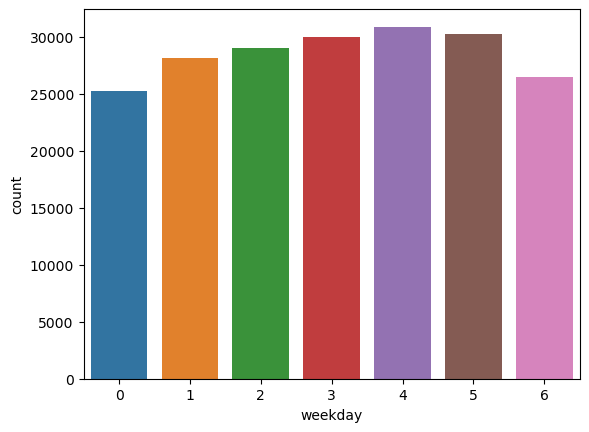

In [29]:
sns.countplot(data=df,x="weekday")

<Axes: xlabel='passenger_count'>

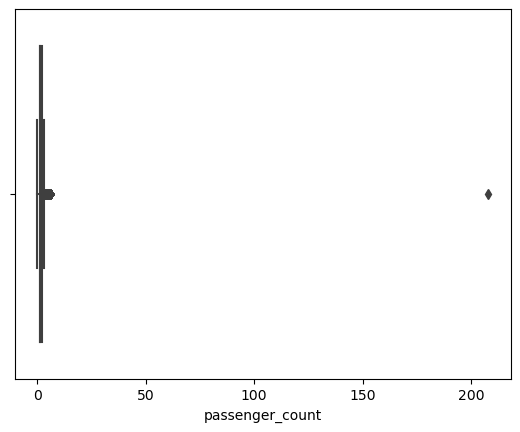

In [45]:
sns.boxplot(data=df,x="passenger_count")

<Axes: xlabel='distance'>

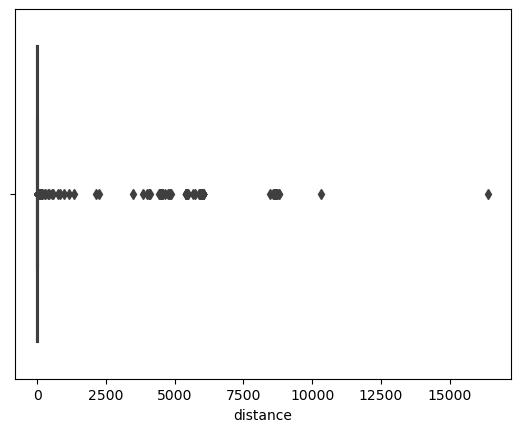

In [46]:
sns.boxplot(data=df,x="distance")

<Axes: xlabel='distance', ylabel='fare_amount'>

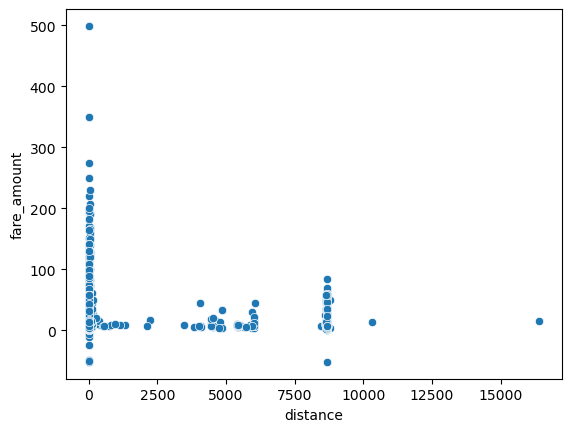

In [30]:
sns.scatterplot(data=df,x="distance",y="fare_amount")

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

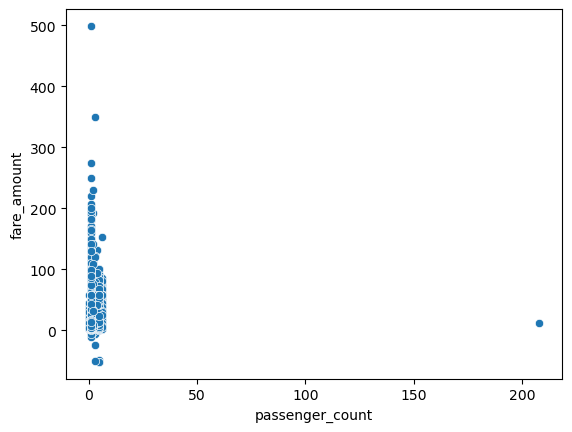

In [32]:
sns.scatterplot(data=df,x="passenger_count",y="fare_amount") 

<Axes: xlabel='passenger_count', ylabel='count'>

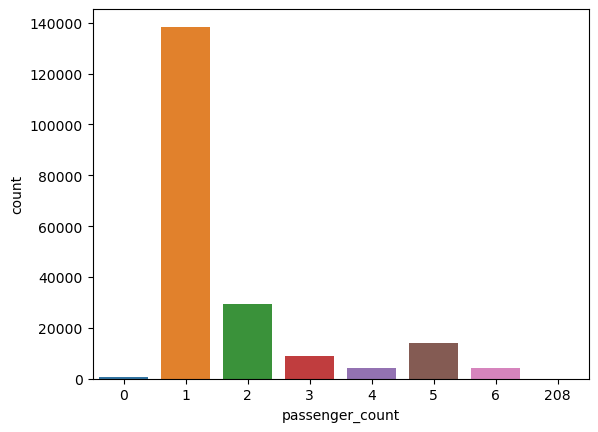

In [33]:
sns.countplot(data=df,x="passenger_count")

#### Observations :
- On monday and Sunday the number of rides have lower count as compared to rest of the weekdays. 
- There are few outliers in the passenger_count feature and many outliers in the distance feature. 
- Even for zero haversine distance the fare amount is very high.
- Maximum number of rides are taken by one passenger only. 


#### Treating the outliers 

In [18]:
## CREATING A FUNCTION TO CALCULATE UPPER WHISKER  AND LOWER WHISKER RANGE 
def iqr(column): 
    q3=df[column].quantile(0.75)
    q1=df[column].quantile(0.25)
    iqr=q3-q1
    upper_boundary=q3+1.5*iqr
    lower_boundary=q1-1.5*iqr 
    return upper_boundary,lower_boundary 


In [19]:
di_boundary={}
for i in ["passenger_count","distance"]:
   
        upper,lower=iqr(i)##CALLING iqr() function here
        di_boundary[i]=[upper,lower]
print("Upper and lower boundaries of columns : ",di_boundary) 
print("\n")

Upper and lower boundaries of columns :  {'passenger_count': [3.5, -0.5], 'distance': [7.865090542985708, -2.7746992481911703]}




In [20]:
di_outliers={}
for feature in  ["passenger_count","distance"]:
   
        counts= df[(df[feature]>di_boundary[feature][0])|(df[feature]<di_boundary[feature][1])][feature].count()
        di_outliers[feature]=counts 
print("=========================================")
print("Number of outliers : ",di_outliers)

Number of outliers :  {'passenger_count': 22557, 'distance': 16755}


- Here we can see that if we take iqr then lot of our data points will be lost
- Hence we can increase the inclusion range using interdecile range instead of iqr. 

In [25]:
## CREATING A FUNCTION TO CALCULATE UPPER WHISKER  AND LOWER WHISKER RANGE 
def idr(column): 
    q3=df[column].quantile(0.90)
    q1=df[column].quantile(0.10)
    iqr=q3-q1
    upper_boundary=q3+1.5*iqr
    lower_boundary=q1-1.5*iqr 
    return upper_boundary,lower_boundary 


In [26]:
di_boundary={}
for i in ["passenger_count","distance"]:
   
        upper,lower=idr(i)##CALLING idr() function here
        di_boundary[i]=[upper,lower]
print("Upper and lower boundaries of columns : ",di_boundary) 
print("\n") 

Upper and lower boundaries of columns :  {'passenger_count': [8.5, -3.5], 'distance': [16.470401194728947, -8.72362281783608]}




In [27]:
di_outliers={}
for feature in  ["passenger_count","distance"]:
   
        counts= df[(df[feature]>di_boundary[feature][0])|(df[feature]<di_boundary[feature][1])][feature].count()
        di_outliers[feature]=counts 
print("=========================================")
print("Number of outliers : ",di_outliers)

Number of outliers :  {'passenger_count': 1, 'distance': 4543}


- Here we can see that less than 5000 datapoints will be removed 

In [55]:
df=df[(df["passenger_count"]>-3.5)&(df["passenger_count"]<8.5)]

In [57]:
df=df[(df["distance"]>-8.72)&(df["distance"]<16.47)] 

#### Identifying Input and Output features

In [58]:
## INPUT VARIABLES
X=df[["passenger_count","distance","weekday"]]

##TARGET VARIABLE 
y=df["fare_amount"] 

#### Splitting the data into train and test

In [59]:
## here the total number of data points are 1329 we can do a 70/30 train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=40)


print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape) 

(146591, 3) (146591,)
(48864, 3) (48864,)


#### Data preprocessing on X_train

In [60]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler() 
X_train_transformed=scaler.fit_transform(X_train) 
print(X_train_transformed.shape) 

(146591, 3)


#### Building Models using regression algorithms 

In [69]:
#using the linear regression 
from sklearn.linear_model import LinearRegression
linear=LinearRegression() 
linear.fit(X_train_transformed,y_train) 

LinearRegression()

In [63]:
#using KNN 
from sklearn.neighbors import KNeighborsRegressor 
knn=KNeighborsRegressor()
knn.fit(X_train_transformed,y_train)

KNeighborsRegressor()

In [64]:
# using decision tree 
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train_transformed,y_train) 

DecisionTreeRegressor()

In [65]:
#using random forest classifier
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train_transformed,y_train)

RandomForestRegressor()

#### Data preprocessing on test data 

In [66]:
#STANDARDIZING USING THE TRAIN DATA VALUES ,HERE WE TRANSFORM THE TEST DATA 
X_test_transformed=scaler.transform(X_test)
print(X_test_transformed.shape) 

(48864, 3)


#### Making Predictions using above Models 

In [70]:
#for logistic regression classifier
y_test_pred_linear=linear.predict(X_test_transformed) 

#for Knn classifier
y_test_pred_knn=knn.predict(X_test_transformed) 

#for decision tree classifier 
y_test_pred_dt=dt.predict(X_test_transformed) 

#for random forest classifier 
y_test_pred_rf=rf.predict(X_test_transformed) 

#### Evaluating the Models on the basis of adjusted r2

In [72]:
from sklearn import metrics



n = len(y_test)
k = X_test.shape[1]
linear_r2 = metrics.r2_score(y_test, y_test_pred_linear)
knn_r2 = metrics.r2_score(y_test, y_test_pred_knn)
dt_r2 = metrics.r2_score(y_test, y_test_pred_dt)
rf_r2 = metrics.r2_score(y_test, y_test_pred_rf)

r2_adj_linear = 1 - (1-linear_r2)*(n-1)/(n-k-1)
r2_adj_knn = 1 - (1-knn_r2)*(n-1)/(n-k-1)
r2_adj_dt = 1 - (1-dt_r2)*(n-1)/(n-k-1) 
r2_adj_rf = 1 - (1-rf_r2)*(n-1)/(n-k-1) 
print("Adjusted R2 for linear regression model :",r2_adj_linear)
print("Adjusted R2 for knn regression model :",r2_adj_knn)
print("Adjusted R2 for decision tree regression model :",r2_adj_dt)
print("Adjusted R2 for random forest regression model :",r2_adj_rf)  

Adjusted R2 for linear regression model : 0.5477233443730181
Adjusted R2 for knn regression model : 0.5321753795176895
Adjusted R2 for decision tree regression model : 0.31156654948330587
Adjusted R2 for random forest regression model : 0.5216167065359947


#### Answer: The adjusted r2 value is least for the model formed by decision tree regressor.

#### Linear Regression Model has the maximum adjusted r2 values therefore it is comparatively better than the rest of the models.